In [3]:
import geopandas as gpd
import os
import sys
os.chdir(sys.path[3])
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Upload three files with
1. Number of thefts per country in US
2. Number of recovery per country in Canada
3. Number of participants per country (US and Canada)


In [4]:
us = gpd.read_file(r'general\Biketheft_esri\theft.gpkg',layer='count_by_us', driver="GPKG")
canada = gpd.read_file(r'general\Biketheft_esri\theft.gpkg',layer='count_by_canada', driver="GPKG")
participants = gpd.read_file(r'general\Biketheft_esri\theft.gpkg',layer='prtcpnt_lctn', driver="GPKG")

### Get the data set up for farther analysis
1. Merge US and Canada files
2. Remove irrelevant columns from the participants file

In [5]:
canada.rename(columns={'PRENAME':'NAME'},inplace=True)
theft_recovery = pd.concat([us,canada])
participants= participants[['Join_Count','NAME']].rename({'Join_Count':'participants'},axis=1)

### The following table summarizes the number of participants, thefts, and recoveries by state and province in the U.S. and Canada

In [6]:
merge_files = participants.merge(theft_recovery,how= 'outer',on='NAME').drop('geometry',axis=1).set_index('NAME').replace({0:np.nan}).fillna(0)
merge_files = merge_files[merge_files.any(axis=1)]
merge_files.sort_values('participants',ascending =False,inplace=True)

#### The pearson values in the table above shows that recovery and participant or recovery and theft (0.85 and 0.86 respectively) have a high correlation, but they are not as high as theft and participant (0.998), which suggests that stolen bikes may be transferred to other states or provinces.

In [7]:
merge_files.corr(method='pearson')

,participants,theft,recovery
participants,1.000000,0.997983,0.849909
theft,0.997983,1.000000,0.863416
recovery,0.849909,0.863416,1.000000


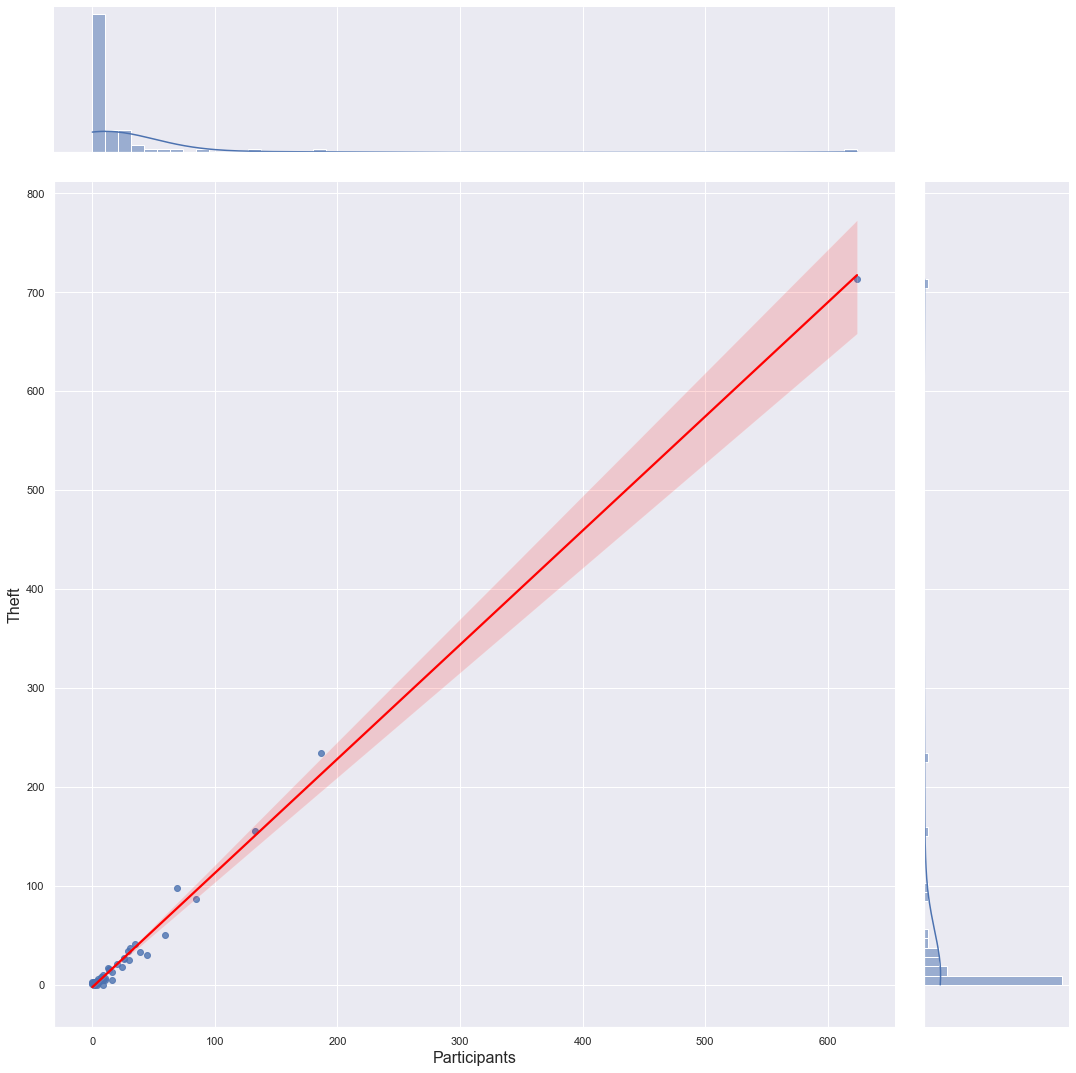

In [29]:
sns.set(style="darkgrid", color_codes=True)
g =sns.jointplot(x='participants',y='theft',data=merge_files,kind='reg',joint_kws={'line_kws':{'color':'red'}},height =15)
g.set_axis_labels('Participants', 'Theft', fontsize=16)

# for i in range(4):
#     row = merge_files.iloc[i]
#     plt.gca().annotate(row.name, xy=(row['participants'], row['theft']),
#             xytext=(4,4), textcoords ="offset points", )
# plt.show()

In [14]:
merge_files.iloc[0].name

'California'